In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [69]:
file_name = 'roku_stock.csv'
roku_df = pd.read_csv(file_name)
roku_df.head()

,Date,Close
0,1/15/2019,40.490002
1,1/16/2019,39.889999
2,1/17/2019,41.630001
3,1/18/2019,40.980000
4,1/22/2019,39.910000


In [74]:
#Used to draw graph of data
def plot(df, test_size=1):
    for col in df.columns[1:]:
        plt.plot(df[col])
        
    #date interval for x-axis (what happens if I dont use this?)
    interval = 60
    dates = df[df.columns[0]]
    x = np.linspace(0,len(dates)-1,int(len(dates)/interval))
    plt.xticks(x,dates[0::interval])
    
    #highlights trained area
    if test_size!=1:
        plt.axvspan(0, len(dates)*(1-test_size), alpha=0.5, color='grey')
    
    #plot titles and axis labels
    plt.legend(['Truth','Prediction'])
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title('Prediction and ground truth over specified time frame')
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\mdasa\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

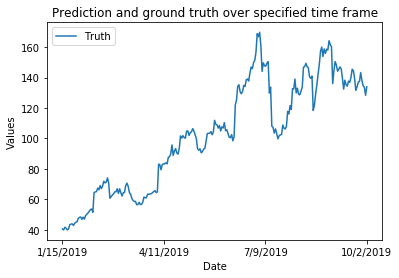

In [75]:
plot(roku_df)

In [47]:
close = roku_df['Close'].values

#how far in advance we want to predict
predict_horizon = 10

#data preprocess
X = close[:-1*predict_horizon].reshape(-1,1)
y = close[predict_horizon:].reshape(len(y),)

#Sanity check: assertions are used to validate something that we know should be true
assert len(X) == len(y)

#randomly divide the data into training and validation sets
#test_size: used to determine the ratio of data used for validation [0,1]
#shuffle: whether or not to shuffle the data. False because time series data is order dependent
#random state: seed for result replication
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False, random_state=42)

In [89]:
#fit the model to the data
model = RandomForestRegressor(n_estimators=100,max_depth=5)
rfr = model.fit(X_train, y_train)

#use model to ouptput predictions
y_hat_horizon = predict_horizon*[0]
y_hat_train=rfr.predict(X_train)
y_hat_test=rfr.predict(X_test)
y_hat = np.concatenate((y_hat_horizon,y_hat_train,y_hat_test))

<module 'matplotlib.pyplot' from 'C:\\Users\\mdasa\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

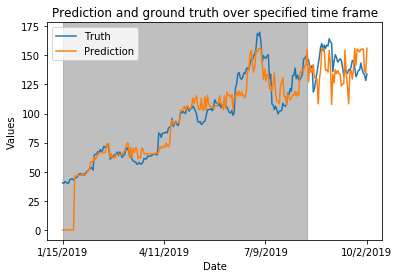

In [90]:
roku_df['Predicted'] = y_hat
plot(roku_df,test_size)